# MODULES AND CONSTANTS 

### MODULES, CONSTANT AND IMPORTS

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




### CONSTANTS

In [314]:
INPUT_TRAINING_DATA = './NYC_Airbnb/Data/development.csv'
INPUT_TESTING_DATA = './NYC_Airbnb/Data/evaluation.csv'




# READ INPUT DATA

reads the input data, organized as such:
Each file has an initial header line, containing the names of attributes at your disposal:
- <b>id</b>: a unique identifier of the listing
- <b>name</b>
- <b>host_id</b>: a unique identifier of the host
- <b>host_name</b> 
- <b>neighborhood_group</b>: neighborhood location in the city
- <b>neighborhood</b>: name of the neighborhood
- <b>latitude</b>: coordinate expressed as floating point number
- <b>longitude</b>: coordinate expressed as floating point number
- <b>room_type</b>
- <b>price</b>: price per night expressed in dollars
- <b>minimum_nights</b>: minimum nights requested by the host
- <b>number_of_reviews</b>
- <b>last_review</b>: date of the last review expressed as YYYY-MM-DD
- <b>reviews_per_month</b>: average number of reviews per month
- <b>calculated_host_listings_count</b>: amount of listing of the host
- <b>availability_365</b>: number of days when the listing is available for booking

In [315]:
def readData(path:str)->pd.DataFrame:
    return pd.read_csv(filepath_or_buffer=path, header=0, index_col=0)

# FILLS NA

Fills the found np.nan value:
<br>name                   13
<br>host_name              19
<br>last_review          8041
<br>reviews_per_month    8041

In [316]:
def replaceNa(df:pd.DataFrame)->pd.DataFrame:
    df['name'] = df['name'].replace({np.nan:'Anonimum'})
    df['host_name'] = df['host_name'].replace({np.nan:'Anonimum'})
    df['reviews_per_month'] = df['reviews_per_month'].replace({np.nan:0})
    return df.drop(labels=['last_review'], axis=1)

# Applies one hot encoding

In [317]:
def applyOneHot(df:pd.DataFrame, encoded:list[str])->pd.DataFrame:
    for column in encoded:
        for label in set(df[column].values):
            df[label] = df[column].map(lambda x: 1 if x == label else 0)
        df = df.drop(labels=[column], axis=1)
    
    return df.drop(labels=['neighbourhood'], axis=1)    
    

# FILTER DATA

Filters the data by removing the outliers:
- price higher than $\mu + 3 *\sigma$
- price lower than 2 $

In [318]:
def filterData(df:pd.DataFrame) -> pd.DataFrame:
    return df[
        (df['price'] >= 2)
        & (df['price'] <= df['price'].mean() + 3 * df['price'].std())
    ]

# MAIN FUNCTION

This is the main function of the program given 

In [369]:
def main()->pd.DataFrame:
    return filterData(applyOneHot(replaceNa(readData(INPUT_TRAINING_DATA)), ['room_type', 'neighbourhood_group']))
    
    
    
df = main()

In [370]:
df

,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private room,Shared room,Entire home/apt,Queens,Staten Island,Brooklyn,Bronx,Manhattan
id,,,,,,,,,,,,,,,,,,,
12783632,NYC Mini Hotel,57230304,Imanuelly,40.74037,-73.88610,75,1,2,0.92,3,351,1,0,0,1,0,0,0,0
3463385,Gorgeous room in Manhattan,10698270,Evgenia,40.76717,-73.95532,95,1,202,3.31,2,263,1,0,0,0,0,0,0,1
17572926,Great 1 Bedroom on Upper East,36578169,James,40.77984,-73.94725,130,2,0,0.00,1,0,0,0,1,0,0,0,0,1
33913644,"Modern and bright 2Bed 2Bath Bushwick, Brooklyn",50981314,Ofier,40.70205,-73.91338,150,2,4,1.64,1,89,0,0,1,0,0,1,0,0
9405895,Stylish and zen Brooklyn retreat,48775347,Mathieu,40.68914,-73.97853,325,3,16,0.42,1,103,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20678811,Flatbush Comfy Room (Rm# 2),147972663,Hyacinth,40.64850,-73.93855,40,3,58,2.57,3,306,1,0,0,0,0,1,0,0
29630190,Cozy Brooklyn Heights - Private Room,223032162,Dot,40.68602,-73.99023,65,2,15,1.80,2,0,1,0,0,0,0,1,0,0
3811639,Beautiful sun-filled Loft BROOKLYN,10603767,Samantha,40.70784,-73.92224,150,3,203,3.42,1,308,0,0,1,0,0,1,0,0


In [371]:
df.isna().sum()[df.isna().sum() > 0] # Number of nan

Series([], dtype: int64)

In [372]:
data = pd.DataFrame( [df.mean(numeric_only=True) + df.std(numeric_only=True)*i for i in range(-3,3+1)]).T
data.columns = pd.MultiIndex.from_arrays([[f'\u03BC {f'{i}*\u03C3' if i < 0 else (f'+{i}*\u03C3' if i > 0 else '') }'for i in range(-3,3+1)]])
data = data.T.drop(labels=['host_id'], axis=1)
data


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private room,Shared room,Entire home/apt,Queens,Staten Island,Brooklyn,Bronx,Manhattan
μ -3*σ,40.565647,-74.089794,-184.491091,-53.656732,-110.814819,-3.710953,-92.453166,-281.385433,-1.037646,-0.429764,-0.978941,-0.844601,-0.252619,-1.064415,-0.422256,-1.048175
μ -2*σ,40.620100,-74.043901,-76.595525,-33.439523,-66.080627,-2.107705,-59.224645,-150.139235,-0.539514,-0.278723,-0.479331,-0.524412,-0.165886,-0.572142,-0.274010,-0.551595
μ -1*σ,40.674552,-73.998008,31.300041,-13.222314,-21.346434,-0.504458,-25.996124,-18.893038,-0.041381,-0.127682,0.020280,-0.204222,-0.079153,-0.079868,-0.125764,-0.055015
μ,40.729005,-73.952115,139.195607,6.994895,23.387759,1.098790,7.232397,112.353160,0.456751,0.023358,0.519891,0.115967,0.007580,0.412406,0.022482,0.441565
μ +1*σ,40.783458,-73.906223,247.091173,27.212104,68.121951,2.702037,40.460919,243.599357,0.954883,0.174399,1.019501,0.436156,0.094313,0.904680,0.170728,0.938146
μ +2*σ,40.837910,-73.860330,354.986738,47.429314,112.856144,4.305285,73.689440,374.845554,1.453016,0.325440,1.519112,0.756345,0.181046,1.396954,0.318974,1.434726
μ +3*σ,40.892363,-73.814437,462.882304,67.646523,157.590337,5.908533,106.917961,506.091752,1.951148,0.476481,2.018723,1.076534,0.267779,1.889228,0.467220,1.931306


In [373]:
df[['host_id', 'calculated_host_listings_count']][df['host_id'] == 219517861]

,host_id,calculated_host_listings_count
id,,
34288305,219517861,327
35005862,219517861,327
32225203,219517861,327
32239551,219517861,327
35005563,219517861,327
...,...,...
32237148,219517861,327
32241577,219517861,327
32241235,219517861,327


In [324]:
# df[df['price']> 5000][['price','room_type', 'minimum_nights']].sort_values(ascending=False, by='price')

In [325]:
# df[['price', 'neighbourhood_group']].groupby(['neighbourhood_group']).agg(lambda x : x.max() - x.mean())

In [326]:
# df[['price', 'neighbourhood']].groupby(['neighbourhood']).agg(lambda x : x.mean()).sort_values(by='price', ascending=False)

<Axes: >

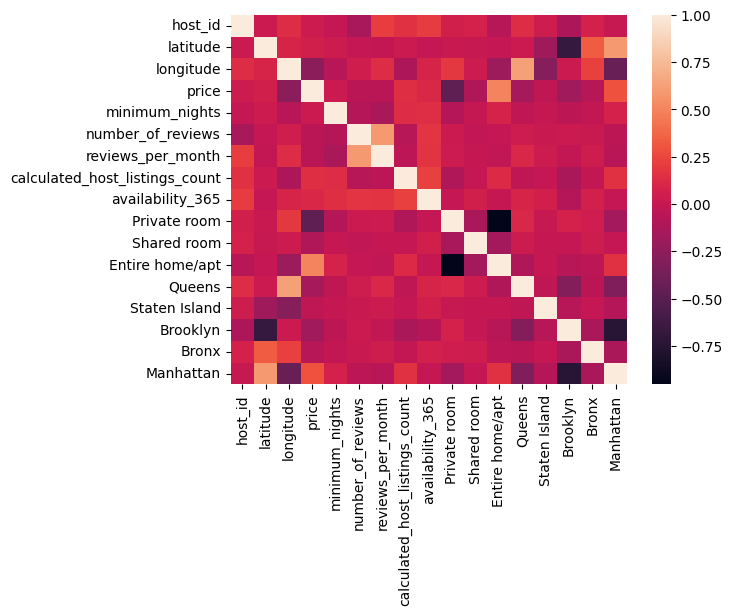

In [327]:
from seaborn import heatmap


heatmap(df.map(lambda x: {
    'Bronx':1,
    'Brooklyn':2,
    'Manhattan':3,
    'Queens':4,
    'Staten Island':5
}[x] if x in ['Bronx',
    'Brooklyn',
    'Manhattan',
    'Queens',
    'Staten Island'] else x).corr(numeric_only=True))

In [376]:
df = df[df['price'] <= df['price'].mean() + 3*df['price'].std()]
# df = df.drop(['name', 'host_id','host_name','latitude', 'longitude', 'calculated_host_listings_count'], axis=1)
#df = df.drop(['Private room','Shared room','Entire home/apt'], axis=1)
df = df.drop(['name', 'host_name'], axis=1)
df

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private room,Shared room,Entire home/apt,Queens,Staten Island,Brooklyn,Bronx,Manhattan
id,,,,,,,,,,,,,,,,,
12783632,57230304,40.74037,-73.88610,75,1,2,0.92,3,351,1,0,0,1,0,0,0,0
3463385,10698270,40.76717,-73.95532,95,1,202,3.31,2,263,1,0,0,0,0,0,0,1
17572926,36578169,40.77984,-73.94725,130,2,0,0.00,1,0,0,0,1,0,0,0,0,1
33913644,50981314,40.70205,-73.91338,150,2,4,1.64,1,89,0,0,1,0,0,1,0,0
9405895,48775347,40.68914,-73.97853,325,3,16,0.42,1,103,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20678811,147972663,40.64850,-73.93855,40,3,58,2.57,3,306,1,0,0,0,0,1,0,0
29630190,223032162,40.68602,-73.99023,65,2,15,1.80,2,0,1,0,0,0,0,1,0,0
3811639,10603767,40.70784,-73.92224,150,3,203,3.42,1,308,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler


df2 = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
df2

# no scaler, lower r2

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Private room,Shared room,Entire home/apt,Queens,Staten Island,Brooklyn,Bronx,Manhattan
0,0.143805,0.000000,0.003180,0.015726,0.961644,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.188053,0.000000,0.321145,0.056581,0.720548,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.265487,0.000801,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.309735,0.000801,0.006359,0.028034,0.243836,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.696903,0.001601,0.025437,0.007179,0.282192,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37948,0.066372,0.001601,0.092210,0.043932,0.838356,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37949,0.121681,0.000801,0.023847,0.030769,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37950,0.309735,0.001601,0.322734,0.058462,0.843836,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
37951,0.530973,0.003203,0.033386,0.005983,0.778082,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


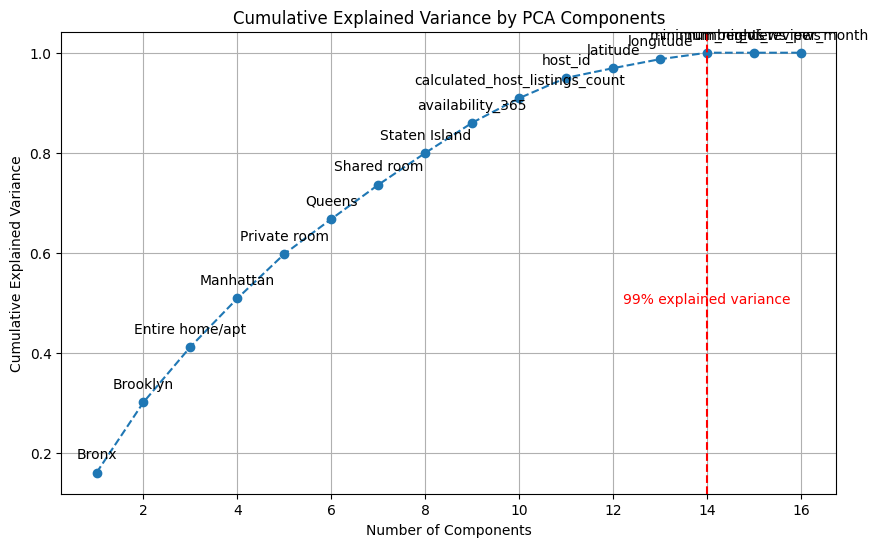

array([[-3.18163131e+06, -1.23393380e+07, -7.51408856e+06, ...,
         2.23904437e+06,  7.06289214e-01,  3.84264936e-01],
       [-5.94748170e+05, -2.30668146e+06, -1.40476091e+06, ...,
         4.18608298e+05,  7.14737468e-01,  5.97729203e-01],
       [-2.03348604e+06, -7.88652538e+06, -4.80247883e+06, ...,
         1.43107302e+06,  7.15495673e-01,  5.97699198e-01],
       ...,
       [-5.89495937e+05, -2.28631157e+06, -1.39236832e+06, ...,
         4.14914139e+05,  7.15461208e-01,  5.96828340e-01],
       [-6.83239134e+05, -2.64992465e+06, -1.61372400e+06, ...,
         4.80900423e+05,  7.15461208e-01,  5.96828340e-01],
       [-1.51968907e+06, -5.89388839e+06, -3.58906760e+06, ...,
         1.06950917e+06,  7.15495673e-01,  5.97699197e-01]])

In [379]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains the features and 'price' column
X_scaled = StandardScaler().fit_transform(df[df.columns.difference(['price'])])

x = PCA().fit(pd.DataFrame(X_scaled, columns=df.columns.difference(['price'])))

cumulative_explained_variance = np.cumsum(x.explained_variance_ratio_)

# Find the number of components needed to explain 99% variance
components_needed = np.argmax(cumulative_explained_variance >= 0.99) + 1

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')

# Add feature names as labels
for i, txt in enumerate(x.feature_names_in_):
    plt.annotate(txt, (i + 1, cumulative_explained_variance[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Add a red vertical line at the 99% explained variance point
plt.axvline(x=components_needed, color='red', linestyle='--')
plt.text(components_needed, 0.5, '99% explained variance', color='red', ha='center')

# Show the plot
plt.grid(True)
plt.show()

temp = x.transform(df[df.columns.difference(['price'])])
temp

In [384]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# temp = pd.DataFrame(temp, columns=list(list(x.feature_names_in_)))

x, X, y, Y = train_test_split(df[df.columns.difference(['price'])], df['price'], test_size=0.2)


mod = RandomForestRegressor().fit(x, y).predict(X)
r2_score(Y, mod), mean_squared_error(Y, mod)

(0.5539382150304937, np.float64(2132.955860764314))

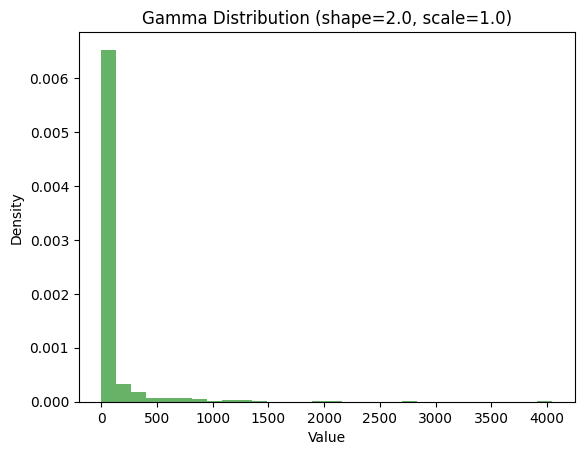

In [331]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gamma distribution
shape = 0.1   # shape parameter (k)
scale = 800   # scale parameter (theta)

# Generate random samples from the Gamma distribution
samples = np.random.gamma(shape, scale, 1000)

# Plot the distribution
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Label the plot
plt.title('Gamma Distribution (shape=2.0, scale=1.0)')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the plot
plt.show()


Estimated Shape: 2.8268403798031203
Estimated Scale: 45.62266325394699


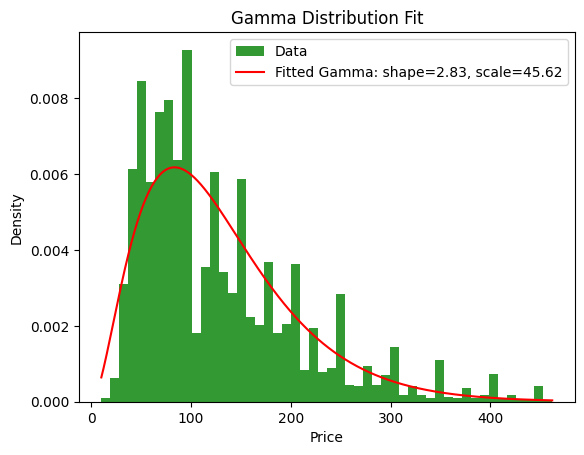

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming you have a DataFrame 'df' with a 'price' column
# Example (replace this with your actual DataFrame):
# df = pd.DataFrame({'price': np.random.gamma(2.0, 1.0, 1000)})

# Extract the 'price' column from the DataFrame
data = df[df['price']>0]['price'].values

# Fit the Gamma distribution to the data
params = stats.gamma.fit(data, floc=0)  # Set location parameter to 0

# Extract the estimated parameters
shape_est, loc_est, scale_est = params
print(f"Estimated Shape: {shape_est}")
print(f"Estimated Scale: {scale_est}")

# Plot the histogram of the data and the fitted Gamma distribution
plt.hist(data, bins=50, density=True, alpha=0.8, color='g', label='Data')

# Create the x-values for the fitted Gamma distribution
x = np.linspace(min(data), max(data), 10000)

# Plot the fitted Gamma distribution
pdf_fitted = stats.gamma.pdf(x, shape_est, loc_est, scale_est)
plt.plot(x, pdf_fitted, 'r-', label=f'Fitted Gamma: shape={shape_est:.2f}, scale={scale_est:.2f}')

# Label the plot
plt.title('Gamma Distribution Fit')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()
